<a href="https://colab.research.google.com/github/Bepo2002/Humbug-4YP/blob/main/Audio_analysis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [380]:
import zipfile
from scipy.io import wavfile
import pandas as pd

# Function to extract sounds from zip - takes the sound id as input
def extract_sound(filename):
  zip_path = './drive/MyDrive/4YP/train.zip'
  dest_dir = './drive/MyDrive/4YP/Data'
  filename_to_extract = 'train/' + str(filename) + '.wav'

  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract(filename_to_extract, dest_dir)
    print(f"{filename_to_extract} has been extracted to {dest_dir}")

  return wavfile.read('./drive/MyDrive/4YP/Data/'+ filename_to_extract)

# Read in .csv
metadata = pd.read_csv('./drive/MyDrive/4YP/Data/humbugdb_meta.csv')
metadata = metadata.set_index('id')

In [381]:
# Choose a random 'an gambiae' sound to analyse
subset = metadata[metadata['species'] == 'an gambiae']
subset = subset.loc[(metadata['length'] < 3) & (metadata['length'] > 0.1)]
sel_sound = subset.sample()
id_value = sel_sound.index.values[0]

# Import the sound wave and find samplerate
samplerate, data = extract_sound(id_value)

train/398.wav has been extracted to ./drive/MyDrive/4YP/Data


# Display Waveform

Sample Rate: 8000 Hz


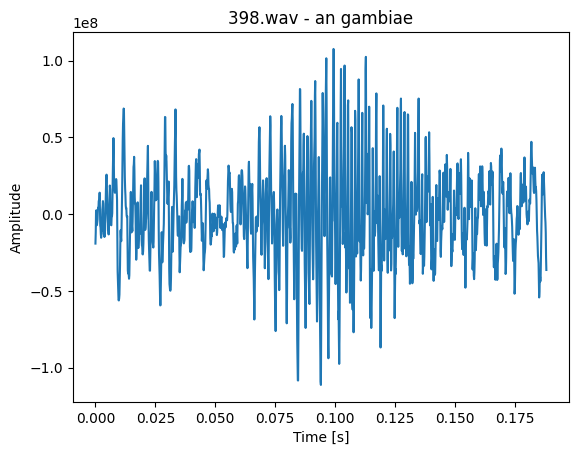

In [382]:
import matplotlib.pyplot as plt
from IPython.display import Audio


# Display Waveform and sound
print("Sample Rate: " + str(samplerate) + ' Hz')
plt.plot(np.linspace(0, len(data)/samplerate, num=len(data)),data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(str(id_value) + '.wav' + ' - ' + sel_sound['species'].values[0])
Audio(data, rate=samplerate)

# Analyse Frequency Spectrum

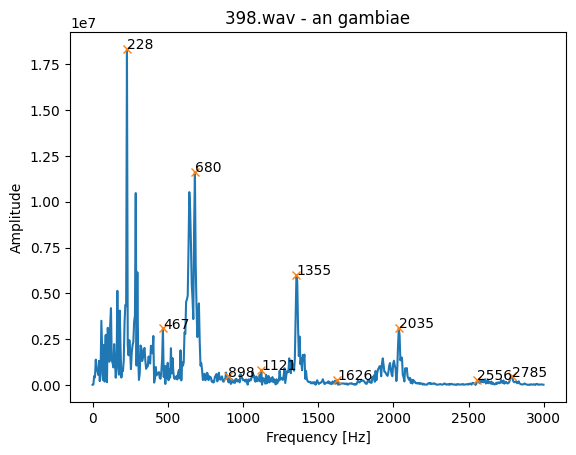

In [383]:
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import find_peaks
import numpy as np

# Define sample period (T) and number of data points (N)
T = 1/samplerate
N = data.size

# Perform the fft
y = fft(data)

# Create the array of frequencies (x-axis)
x = fftfreq(N,T)[:N//2]
x = x[x <= 3000]

# Create the absolute magnitude fft
y_n = 2.0/N * np.abs(y[0:x.size])

# Plot the spectrum
plt.plot(x, y_n)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title(str(id_value) + '.wav' + ' - ' + sel_sound['species'].values[0])

# Plot the peaks and label with frequency values
peaks, _ = find_peaks(y_n, prominence=100000, distance = 40)
plt.plot(x[peaks], y_n[peaks], 'x')
for peak in peaks:
  plt.text(x[peak], y_n[peak], str(int(x[peak])))

plt.savefig('./drive/MyDrive/4YP/Generated/'+ str(id_value) + '_fft.png')
plt.show()

# Analyse Spectrogram

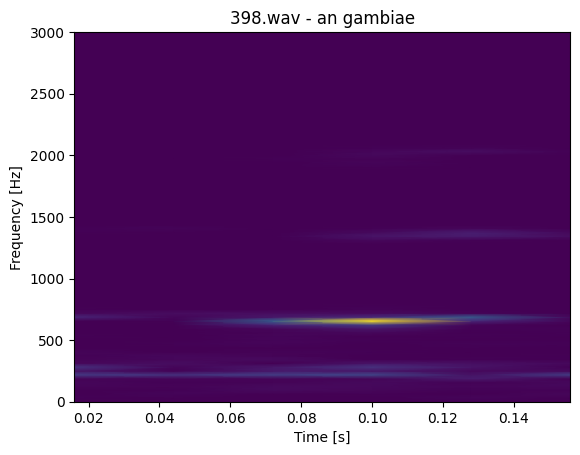

In [384]:
from scipy import signal

f, t, Sxx = signal.spectrogram(data, samplerate)


fmin = 0 # Hz
fmax = 3000 # Hz
freq_slice = np.where((f >= fmin) & (f <= fmax))
f   = f[freq_slice]
Sxx = Sxx[freq_slice,:][0]

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title(str(id_value) + '.wav' + ' - ' + sel_sound['species'].values[0])
plt.savefig('./drive/MyDrive/4YP/Generated/'+ str(id_value) + '_spectro.png')
plt.show()

# Analyse Mel-Frequency Cepstral Coefficients (MFCCs)

[[ 1.76456952e+03  1.80778100e+03  1.81597756e+03]
 [ 1.18928839e+02  1.23372183e+02  1.15476645e+02]
 [-9.38669119e-01 -1.01128423e+01 -8.08528868e+00]
 [ 2.36558832e+01  2.52663142e+01  2.62356058e+01]
 [-1.41324371e+01 -1.98483274e+01 -1.42931733e+01]
 [-2.95246262e+00 -6.31157488e+00 -1.05522410e+01]
 [-1.30933055e+01 -9.28790245e+00 -1.32030764e+00]
 [ 1.12446588e+01  1.36274933e+01  8.82084248e+00]
 [ 4.15290083e+00  1.19428258e+01  1.76010195e+01]
 [-1.72236171e+01 -1.13912283e+01 -1.00989332e+01]
 [-2.98177887e+01 -4.41653146e+01 -3.96049336e+01]
 [-8.73787518e+00  6.31774777e+00  6.49838909e+00]
 [-1.03971286e+01 -1.96259340e+01 -1.84796430e+01]
 [-9.45614299e+00 -1.69907744e+01 -2.00926220e+01]
 [ 3.45990320e+01  3.49433455e+01  2.41337611e+01]
 [-7.65217312e-01  1.10598859e+01  1.66209708e+01]
 [-1.29951350e+01 -2.18400673e+01 -2.09165380e+01]
 [ 7.84314684e+00  1.70459523e+01  1.50042848e+01]
 [-1.39239064e+01 -2.69285516e+01 -2.23462826e+01]
 [ 1.27609175e+01  1.03499795e+

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1505
  warnings.warn(


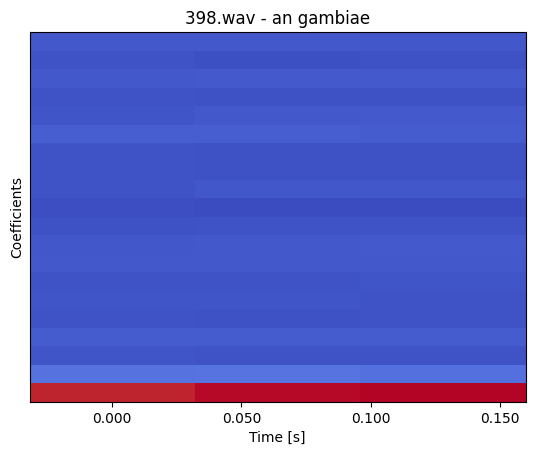

In [385]:
import librosa

# Generate the coefficients
mfccs = librosa.feature.mfcc(y=data.astype(float), sr=samplerate)
print(mfccs)

# Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=samplerate, x_axis='time')
plt.ylabel('Coefficients')
plt.xlabel('Time [s]')
plt.title(str(id_value) + '.wav' + ' - ' + sel_sound['species'].values[0])
plt.show()